In [1]:
#%matplotlib notebook

In [2]:
# Dependencies
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

### Using MatplotLib to Chart a DataFrame

In [4]:
# Load in csv
df = pd.read_csv("../dailyData/dailyData.csv")
df.head()

,Draw Date,Draw Schedule,First Number,Second Number,Third Number
0,7/9/2019,Morning,8,1,3
1,7/9/2019,Evening,2,3,0
2,7/10/2019,Morning,9,9,5
3,7/10/2019,Evening,2,3,2
4,7/11/2019,Morning,4,3,2


In [5]:
df.columns = ['Date',  'Schedule' , 'First' , 'Second','Third']
df.head()

,Date,Schedule,First,Second,Third
0,7/9/2019,Morning,8,1,3
1,7/9/2019,Evening,2,3,0
2,7/10/2019,Morning,9,9,5
3,7/10/2019,Evening,2,3,2
4,7/11/2019,Morning,4,3,2


In [6]:
new_df= df
new_df_col = new_df[['First','Second','Third']].copy()
new_df_col.head()


,First,Second,Third
0,8,1,3
1,2,3,0
2,9,9,5
3,2,3,2
4,4,3,2


In [7]:
new_df_col1 = new_df[['First']].copy()
new_df_col1.head()

,First
0,8
1,2
2,9
3,2
4,4


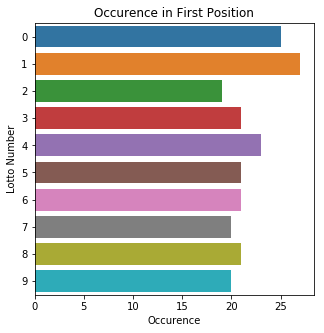

In [10]:
plt.figure(figsize=(5,5))
ax = sns.countplot(y="First", data=new_df_col1)
plt.title("Occurence in First Position")
plt.xlabel("Occurence")
plt.ylabel("Lotto Number")
plt.savefig("../Images/first.png")
#plt.tight_layout()
plt.show()

In [11]:
new_df_col2 = new_df[['Second']].copy()
new_df_col2.head()

,Second
0,1
1,3
2,9
3,3
4,3


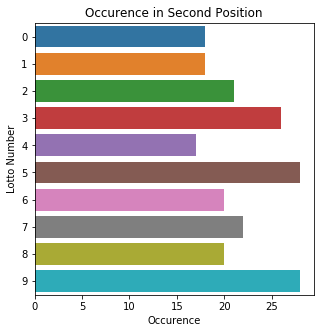

In [12]:
plt.figure(figsize=(5,5))
ax = sns.countplot(y="Second", data=new_df_col2)
plt.title("Occurence in Second Position")
plt.xlabel("Occurence")
plt.ylabel("Lotto Number")

plt.savefig("../Images/second.png")
#plt.tight_layout()
plt.show()


In [13]:
new_df_col3 = new_df[['Third']].copy()
new_df_col3.head()

,Third
0,3
1,0
2,5
3,2
4,2


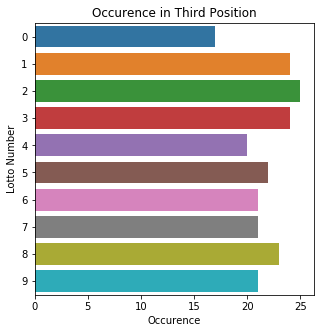

In [14]:
plt.figure(figsize=(5,5))
ax = sns.countplot(y="Third", data=new_df_col3)
plt.title("Occurence in Third Position")
plt.xlabel("Occurence")
plt.ylabel("Lotto Number")

plt.savefig("../Images/third.png")
#plt.tight_layout()
plt.show()


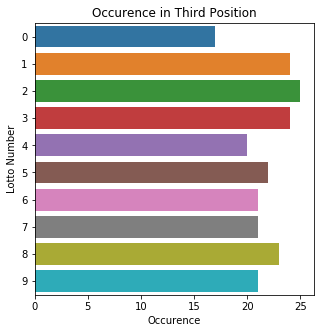

In [15]:
# try plot repeat but not saving to file
plt.figure(figsize=(5,5))
ax = sns.countplot(y="Third", data=new_df_col3)
plt.title("Occurence in Third Position")
plt.xlabel("Occurence")
plt.ylabel("Lotto Number")
#plt.savefig("Images/third.png")
#plt.tight_layout()
plt.show()

In [16]:
new_df_col_all= new_df_col[['First', 'Second' ,'Third']].copy()
new_df_col_all.head()

,First,Second,Third
0,8,1,3
1,2,3,0
2,9,9,5
3,2,3,2
4,4,3,2


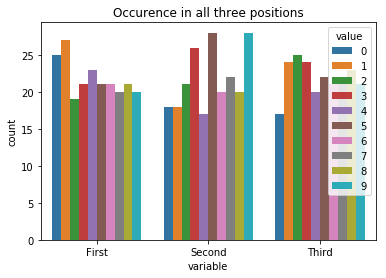

In [18]:
sns.countplot(x="variable", hue="value", data=pd.melt(new_df_col_all))
plt.title("Occurence in all three positions")
#plt.xlabel("Position")
#plt.ylabel("Occurence")
plt.savefig("../Images/allposition.png")

plt.show()

In [19]:
#finding the most occurence percentage, the hot numbers

In [20]:
aTest=new_df_col1.First.value_counts()
hot_First = aTest.index[0]
bTest=new_df_col2.Second.value_counts()
hot_Second = bTest.index[0]
hot_Seconda = bTest.index[1]
new_df_col3.Third.value_counts()
cTest = new_df_col3.Third.value_counts()
hot_Third = cTest.index[0]
print(hot_First,hot_Second,hot_Seconda,hot_Third)


1 9 5 2


In [237]:
#Count of occurances  in first position
First= new_df_col.groupby(['First']).count().reset_index()
First = First.drop(columns=['First', 'Third'])
First = First.rename(columns={'Second': 'First'}).reset_index()
#Count of occurances  in second position
Second= new_df_col.groupby(['Second']).count().reset_index()
Second = Second.drop(columns=['Second', 'Third'])
Second = Second.rename(columns={'First': 'Second'}).reset_index()
#Count of occurances  in third position
Third= new_df_col.groupby(['Third']).count().reset_index()
Third = Third.drop(columns=['Third', 'Second'])
Third = Third.rename(columns={'First': 'Third'}).reset_index()
#Mergec Columns
hotN =  pd.merge(First, Second,  on='index', how='inner')
hotN =  pd.merge(hotN, Third,  on='index', how='inner')
#Get total
hotN['Total'] = hotN['First'].sum()
#Get percentages
hotN['PFirst'] = hotN['First']/hotN['Total']
hotN['PSecond'] = hotN['Second']/hotN['Total']
hotN['PThird'] = hotN['Third']/hotN['Total']
hotN = hotN.rename(columns = {'index': 'LottoNum'}).reset_index()
#Get index of max values
hotNarray = hotN.idxmax().values
#declare an array
valNarray = []
#get hot number and % of occurance for 1st position
photF= hotN[(hotN['LottoNum'] == hotNarray[6])]
photF = photF[['LottoNum', 'PFirst']]
valNarray.append(photF.values[0])
#get hot number and % of occurance for 2nd position
photS= hotN[(hotN['LottoNum'] == hotNarray[7])]
photS = photS[['LottoNum', 'PSecond']]
valNarray.append(photS.values[0])
#get hot number and % of occurance for 3rd position
photT= hotN[(hotN['LottoNum'] == hotNarray[8])]
photT = photT[['LottoNum', 'PThird']]
valNarray.append(photT.values[0])
#turn to dataframe
dfhotNum = pd.DataFrame(valNarray)
#print
dfhotNum

,0,1
0,1.0,0.123853
1,5.0,0.128440
2,2.0,0.114679


<Figure size 360x360 with 0 Axes>

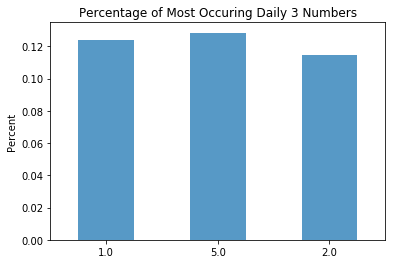

In [235]:
# plot the hot number graph
plt.figure(figsize=(5,5))
dfhotNum.plot(kind='bar', x =0, y = 1,alpha=0.75, rot=0, legend=None)
plt.title("Percentage of Most Occuring Daily 3 Numbers")
#plt.xlabel("Daily 3 Number by Position")
plt.ylabel("Percent")
plt.xlabel("")
plt.savefig("../Images/hotnumber.png")
plt.show()

In [21]:
#total rows of data
len(new_df_col.index)

218

In [22]:
c1 = new_df_col1.First.value_counts(dropna=False)
p1 = new_df_col1.First.value_counts(dropna=False, normalize=True)
df_pct1 = pd.concat([c1,p1], axis=1, keys=['counts', '%'])
df_pct1

,counts,%
1,27,0.123853
0,25,0.114679
4,23,0.105505
8,21,0.096330
6,21,0.096330
5,21,0.096330
3,21,0.096330
9,20,0.091743
7,20,0.091743
2,19,0.087156


In [23]:
First_pct= df_pct1['%'].iloc[0]
First = round((First_pct *100),1)
First

12.4

In [24]:
c2 = new_df_col2.Second.value_counts(dropna=False)
p2 = new_df_col2.Second.value_counts(dropna=False, normalize=True)
df_pct2 = pd.concat([c2,p2], axis=1, keys=['counts', '%'])
df_pct2

,counts,%
9,28,0.128440
5,28,0.128440
3,26,0.119266
7,22,0.100917
2,21,0.096330
8,20,0.091743
6,20,0.091743
1,18,0.082569
0,18,0.082569
4,17,0.077982


In [25]:
# In second position  there are two numbers with same percentage
Second_pct= df_pct2['%'].iloc[0]
Second = round((Second_pct *100),1)
Second

12.8

In [26]:
c3 = new_df_col3.Third.value_counts(dropna=False)
p3 = new_df_col3.Third.value_counts(dropna=False, normalize=True)
df_pct3 = pd.concat([c3,p3], axis=1, keys=['counts', '%'])
df_pct3


,counts,%
2,25,0.114679
3,24,0.110092
1,24,0.110092
8,23,0.105505
5,22,0.100917
9,21,0.096330
7,21,0.096330
6,21,0.096330
4,20,0.091743
0,17,0.077982


In [27]:
Third_pct= df_pct3['%'].iloc[0]
Third = round ((Third_pct *100),1)
Third


11.5

In [28]:
#create new dataframe to plot the hot number in the three position
dataHH = [[hot_First,First],[hot_Second,Second],[hot_Third,Third]]
df_hh = pd.DataFrame(dataHH,columns=['Hot','Percentage'])
df_hh


,Hot,Percentage
0,1,12.4
1,9,12.8
2,2,11.5


<Figure size 360x360 with 0 Axes>

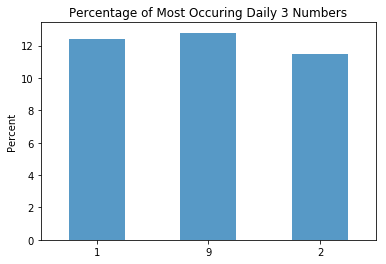

In [30]:
# plot the hot number graph
plt.figure(figsize=(5,5))
df_hh.plot(kind='bar', x ='Hot', y = 'Percentage',alpha=0.75, rot=0, legend=None)
plt.title("Percentage of Most Occuring Daily 3 Numbers")
#plt.xlabel("Daily 3 Number by Position")
plt.ylabel("Percent")
plt.xlabel("")
plt.savefig("../Images/hotnumber.png")
plt.show()

In [31]:
# plot the other hot number graph
dataHHH = [[hot_First,First],[hot_Seconda,Second],[hot_Third,Third]]
df_hhh = pd.DataFrame(dataHHH,columns=['Hot','Percentage'])
df_hhh

,Hot,Percentage
0,1,12.4
1,5,12.8
2,2,11.5


<Figure size 360x360 with 0 Axes>

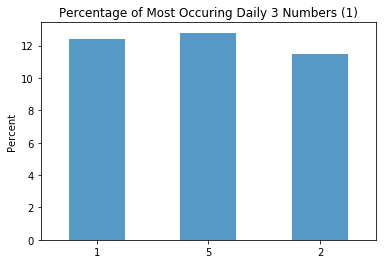

In [32]:
plt.figure(figsize=(5,5))
df_hhh.plot(kind='bar', x ='Hot', y = 'Percentage',alpha=0.75, rot=0, legend=None)
plt.title("Percentage of Most Occuring Daily 3 Numbers (1)")
#plt.xlabel("Daily 3 Number by Position")
plt.ylabel("Percent")
plt.xlabel("")
plt.savefig("../Images/hotnumberA.png")
plt.show()
